In this part 3 of Modelling, it will be on a different set of 2 styles: Industrial and Scandinavian

In [7]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt
from numpy import asarray
from sklearn.model_selection import train_test_split
import random

from keras.preprocessing.image import ImageDataGenerator

from os import listdir
import os

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

---
## Train Test Split

In [2]:
src = './data/simple/raw2/'

In [3]:
target = './data/simple/processed2/'

In [4]:
for style in listdir(src):
        
    print(f'Currently processing style: {style}')
        
    # load all images in a list
    loaded_images = list()
    for img in listdir(src +'/' + style):
        # load image
        pict = Image.open(src +'/' + style + '/' + img)
        pict = pict.convert('RGB') # ensure image is in 'RGB' to save as jpg
        pict_array = asarray(pict)
            # img_data = image.imread(src +'/' + style + '/' + img)
        # store loaded image
        loaded_images.append([img[:-4], pict_array])
        print('> loaded %s %s' % (img, pict_array.shape))
        
    random.shuffle(loaded_images)
    length = len(loaded_images)
    split_len = round(length*0.8)
    train = loaded_images[:split_len]
    test = loaded_images[split_len:]
    
    if not os.path.exists(target + '/train/' + style):
        os.makedirs(target + '/train/' + style)
    if not os.path.exists(target + '/test/' + style):
        os.makedirs(target + '/test/' + style)
        
    for pict_array in train:
        print(f'Saving train image: {pict_array[0]}')
        pict_name = pict_array[0]
        pict = Image.fromarray(pict_array[1])
        pict.save(target + '/train/' + style + '/' + pict_name + '.jpg', quality=100)
        print(f'Saved train image: {pict_array[0]}')
        
    for pict_array in test:
        print(f'Saving test image: {pict_array[0]}')
        pict_name = pict_array[0]
        pict = Image.fromarray(pict_array[1])
        pict.save(target + '/test/' + style + '/' + pict_name + '.jpg', quality=100)
        print(f'Saved test image: {pict_array[0]}')
        
    print('*********************************************************************************')

Currently processing style: Industrial
> loaded 11649.jpg (690, 1080, 3)
> loaded 11651.jpg (634, 1080, 3)
> loaded 11653.jpg (721, 1080, 3)
> loaded 11654.jpg (721, 1080, 3)
> loaded 11655.jpg (676, 1080, 3)
> loaded 11662.jpg (1369, 1080, 3)
> loaded 11663.jpg (640, 1080, 3)
> loaded 11664.jpg (742, 1080, 3)
> loaded 11665.jpg (736, 1080, 3)
> loaded 11666.jpg (1452, 1080, 3)
> loaded 11667.jpg (1185, 1080, 3)
> loaded 11668.jpg (1489, 1080, 3)
> loaded 11713.jpg (1135, 1080, 3)
> loaded 11714.jpg (720, 1080, 3)
> loaded 11715.jpg (720, 1080, 3)
> loaded 11716.jpg (720, 1080, 3)
> loaded 11717.jpg (1620, 1080, 3)
> loaded 11718.jpg (696, 1080, 3)
> loaded 11719.jpg (1620, 1080, 3)
> loaded 12120.jpg (1620, 1080, 3)
> loaded 12121.jpg (720, 1080, 3)
> loaded 12122.jpg (1620, 1080, 3)
> loaded 12124.jpg (720, 1080, 3)
> loaded 12126.jpg (721, 1080, 3)
> loaded 12127.jpg (720, 1080, 3)
> loaded 12129.jpg (720, 1080, 3)
> loaded 125625.jpg (1825, 1080, 3)
> loaded 125626.jpg (1620, 1080,

> loaded 230911.jpg (1512, 1080, 3)
> loaded 230912.jpg (720, 1080, 3)
> loaded 230914.jpg (1513, 1080, 3)
> loaded 230915.jpg (720, 1080, 3)
> loaded 230916.jpg (664, 1080, 3)
> loaded 230918.jpg (720, 1080, 3)
> loaded 230920.jpg (720, 1080, 3)
> loaded 230921.jpg (648, 1080, 3)
> loaded 230922.jpg (1512, 1080, 3)
> loaded 232430.jpg (720, 1080, 3)
> loaded 232432.jpg (720, 1080, 3)
> loaded 232433.jpg (723, 1080, 3)
> loaded 232434.jpg (1620, 1080, 3)
> loaded 232436.jpg (720, 1080, 3)
> loaded 232437.jpg (720, 1080, 3)
> loaded 23357.jpg (826, 1080, 3)
> loaded 23358.jpg (780, 1080, 3)
> loaded 23360.jpg (1599, 1080, 3)
> loaded 23361.jpg (783, 1080, 3)
> loaded 23362.jpg (753, 1080, 3)
> loaded 23363.jpg (844, 1080, 3)
> loaded 23364.jpg (720, 1080, 3)
> loaded 23365.jpg (880, 1080, 3)
> loaded 233801.jpg (720, 1080, 3)
> loaded 233802.jpg (720, 1080, 3)
> loaded 233803.jpg (720, 1080, 3)
> loaded 233804.jpg (720, 1080, 3)
> loaded 233805.jpg (720, 1080, 3)
> loaded 233806.jpg (72

> loaded 281553.jpg (711, 1080, 3)
> loaded 281852.jpg (695, 1080, 3)
> loaded 281853.jpg (1620, 1080, 3)
> loaded 281854.jpg (720, 1080, 3)
> loaded 281856.jpg (720, 1080, 3)
> loaded 281857.jpg (720, 1080, 3)
> loaded 281858.jpg (720, 1080, 3)
> loaded 281900.jpg (721, 1080, 3)
> loaded 281901.jpg (721, 1080, 3)
> loaded 281903.jpg (721, 1080, 3)
> loaded 281904.jpg (721, 1080, 3)
> loaded 281905.jpg (721, 1080, 3)
> loaded 282181.jpg (720, 1080, 3)
> loaded 282183.jpg (720, 1080, 3)
> loaded 282185.jpg (720, 1080, 3)
> loaded 282189.jpg (720, 1080, 3)
> loaded 282190.jpg (720, 1080, 3)
> loaded 282199.jpg (740, 1080, 3)
> loaded 282200.jpg (720, 1080, 3)
> loaded 282203.jpg (720, 1080, 3)
> loaded 282204.jpg (720, 1080, 3)
> loaded 282205.jpg (747, 1080, 3)
> loaded 283095.jpg (1620, 1080, 3)
> loaded 283096.jpg (720, 1080, 3)
> loaded 283097.jpg (720, 1080, 3)
> loaded 283098.jpg (720, 1080, 3)
> loaded 283099.jpg (720, 1080, 3)
> loaded 283101.jpg (720, 1080, 3)
> loaded 283222.jp

> loaded 351139.jpg (1620, 1080, 3)
> loaded 351140.jpg (711, 1080, 3)
> loaded 351141.jpg (720, 1080, 3)
> loaded 351142.jpg (720, 1080, 3)
> loaded 351144.jpg (720, 1080, 3)
> loaded 351145.jpg (720, 1080, 3)
> loaded 351146.jpg (1620, 1080, 3)
> loaded 353397.jpg (721, 1080, 3)
> loaded 353398.jpg (721, 1080, 3)
> loaded 353400.jpg (721, 1080, 3)
> loaded 353401.jpg (1618, 1080, 3)
> loaded 353402.jpg (721, 1080, 3)
> loaded 353403.jpg (1618, 1080, 3)
> loaded 353404.jpg (721, 1080, 3)
> loaded 353406.jpg (721, 1080, 3)
> loaded 353407.jpg (721, 1080, 3)
> loaded 353540.jpg (720, 1080, 3)
> loaded 353685.jpg (1620, 1080, 3)
> loaded 353686.jpg (1620, 1080, 3)
> loaded 353687.jpg (1620, 1080, 3)
> loaded 353688.jpg (720, 1080, 3)
> loaded 353689.jpg (1620, 1080, 3)
> loaded 353690.jpg (720, 1080, 3)
> loaded 353693.jpg (1620, 1080, 3)
> loaded 353694.jpg (720, 1080, 3)
> loaded 353695.jpg (720, 1080, 3)
> loaded 359562.jpg (771, 1080, 3)
> loaded 359563.jpg (1620, 1080, 3)
> loaded 3

> loaded 415995.jpg (1620, 1080, 3)
> loaded 417861.jpg (720, 1080, 3)
> loaded 417862.jpg (720, 1080, 3)
> loaded 417864.jpg (1619, 1080, 3)
> loaded 417865.jpg (720, 1080, 3)
> loaded 417866.jpg (720, 1080, 3)
> loaded 417867.jpg (720, 1080, 3)
> loaded 417868.jpg (1619, 1080, 3)
> loaded 417869.jpg (720, 1080, 3)
> loaded 417870.jpg (1619, 1080, 3)
> loaded 417874.jpg (1619, 1080, 3)
> loaded 417895.jpg (720, 1080, 3)
> loaded 417896.jpg (720, 1080, 3)
> loaded 417897.jpg (720, 1080, 3)
> loaded 417899.jpg (720, 1080, 3)
> loaded 417900.jpg (720, 1080, 3)
> loaded 417901.jpg (720, 1080, 3)
> loaded 417904.jpg (722, 1080, 3)
> loaded 417905.jpg (720, 1080, 3)
> loaded 417906.jpg (720, 1080, 3)
> loaded 417908.jpg (720, 1080, 3)
> loaded 418700.jpg (1599, 1080, 3)
> loaded 418702.jpg (1580, 1080, 3)
> loaded 418703.jpg (677, 1080, 3)
> loaded 418704.jpg (741, 1080, 3)
> loaded 418705.jpg (718, 1080, 3)
> loaded 418706.jpg (1627, 1080, 3)
> loaded 418707.jpg (1631, 1080, 3)
> loaded 41

> loaded 434690.jpg (720, 1080, 3)
> loaded 434691.jpg (720, 1080, 3)
> loaded 434692.jpg (720, 1080, 3)
> loaded 434693.jpg (720, 1080, 3)
> loaded 434694.jpg (720, 1080, 3)
> loaded 434695.jpg (720, 1080, 3)
> loaded 435276.jpg (721, 1080, 3)
> loaded 435277.jpg (721, 1080, 3)
> loaded 436348.jpg (721, 1080, 3)
> loaded 436349.jpg (721, 1080, 3)
> loaded 436350.jpg (1618, 1080, 3)
> loaded 436735.jpg (721, 1080, 3)
> loaded 436894.jpg (813, 1080, 3)
> loaded 437242.jpg (720, 1080, 3)
> loaded 437243.jpg (720, 1080, 3)
> loaded 437244.jpg (1620, 1080, 3)
> loaded 437245.jpg (720, 1080, 3)
> loaded 437248.jpg (1620, 1080, 3)
> loaded 437250.jpg (1620, 1080, 3)
> loaded 437253.jpg (720, 1080, 3)
> loaded 437254.jpg (720, 1080, 3)
> loaded 437258.jpg (1531, 1080, 3)
> loaded 437261.jpg (720, 1080, 3)
> loaded 437433.jpg (720, 1080, 3)
> loaded 437434.jpg (1620, 1080, 3)
> loaded 437435.jpg (720, 1080, 3)
> loaded 437439.jpg (721, 1080, 3)
> loaded 437440.jpg (720, 1080, 3)
> loaded 43744

Saved train image: 75481
Saving train image: 159061
Saved train image: 159061
Saving train image: 415992
Saved train image: 415992
Saving train image: 418707
Saved train image: 418707
Saving train image: 16560
Saved train image: 16560
Saving train image: 16561
Saved train image: 16561
Saving train image: 444237
Saved train image: 444237
Saving train image: 261521
Saved train image: 261521
Saving train image: 430967
Saved train image: 430967
Saving train image: 420263
Saved train image: 420263
Saving train image: 425876
Saved train image: 425876
Saving train image: 359562
Saved train image: 359562
Saving train image: 432742
Saved train image: 432742
Saving train image: 420253
Saved train image: 420253
Saving train image: 23468
Saved train image: 23468
Saving train image: 183465
Saved train image: 183465
Saving train image: 85621
Saved train image: 85621
Saving train image: 262952
Saved train image: 262952
Saving train image: 230912
Saved train image: 230912
Saving train image: 415987
Sa

Saved train image: 17966
Saving train image: 369124
Saved train image: 369124
Saving train image: 374613
Saved train image: 374613
Saving train image: 444242
Saved train image: 444242
Saving train image: 20268
Saved train image: 20268
Saving train image: 427031
Saved train image: 427031
Saving train image: 288591
Saved train image: 288591
Saving train image: 441215
Saved train image: 441215
Saving train image: 377649
Saved train image: 377649
Saving train image: 253698
Saved train image: 253698
Saving train image: 300914
Saved train image: 300914
Saving train image: 160964
Saved train image: 160964
Saving train image: 318001
Saved train image: 318001
Saving train image: 411466
Saved train image: 411466
Saving train image: 421626
Saved train image: 421626
Saving train image: 378190
Saved train image: 378190
Saving train image: 379507
Saved train image: 379507
Saving train image: 336574
Saved train image: 336574
Saving train image: 419205
Saved train image: 419205
Saving train image: 134

Saved train image: 260212
Saving train image: 444232
Saved train image: 444232
Saving train image: 161933
Saved train image: 161933
Saving train image: 377654
Saved train image: 377654
Saving train image: 382847
Saved train image: 382847
Saving train image: 18419
Saved train image: 18419
Saving train image: 261639
Saved train image: 261639
Saving train image: 226113
Saved train image: 226113
Saving train image: 368111
Saved train image: 368111
Saving train image: 432736
Saved train image: 432736
Saving train image: 302891
Saved train image: 302891
Saving train image: 23469
Saved train image: 23469
Saving train image: 75480
Saved train image: 75480
Saving train image: 283224
Saved train image: 283224
Saving train image: 434665
Saved train image: 434665
Saving train image: 424632
Saved train image: 424632
Saving train image: 351138
Saved train image: 351138
Saving train image: 127310
Saved train image: 127310
Saving train image: 301038
Saved train image: 301038
Saving train image: 23364


Saved train image: 422233
Saving train image: 270878
Saved train image: 270878
Saving train image: 264294
Saved train image: 264294
Saving train image: 261451
Saved train image: 261451
Saving train image: 24350
Saved train image: 24350
Saving train image: 160970
Saved train image: 160970
Saving train image: 420993
Saved train image: 420993
Saving train image: 332191
Saved train image: 332191
Saving train image: 418705
Saved train image: 418705
Saving train image: 441217
Saved train image: 441217
Saving train image: 160919
Saved train image: 160919
Saving train image: 171779
Saved train image: 171779
Saving train image: 411248
Saved train image: 411248
Saving train image: 81892
Saved train image: 81892
Saving train image: 369121
Saved train image: 369121
Saving train image: 440091
Saved train image: 440091
Saving train image: 23465
Saved train image: 23465
Saving train image: 433874
Saved train image: 433874
Saving train image: 436350
Saved train image: 436350
Saving train image: 421638

Saved train image: 365618
Saving train image: 282183
Saved train image: 282183
Saving train image: 75676
Saved train image: 75676
Saving train image: 342169
Saved train image: 342169
Saving train image: 436349
Saved train image: 436349
Saving train image: 171781
Saved train image: 171781
Saving train image: 273833
Saved train image: 273833
Saving train image: 324079
Saved train image: 324079
Saving train image: 262948
Saved train image: 262948
Saving train image: 376876
Saved train image: 376876
Saving train image: 365628
Saved train image: 365628
Saving train image: 281542
Saved train image: 281542
Saving train image: 353689
Saved train image: 353689
Saving train image: 427028
Saved train image: 427028
Saving train image: 281901
Saved train image: 281901
Saving train image: 419200
Saved train image: 419200
Saving train image: 378220
Saved train image: 378220
Saving train image: 233802
Saved train image: 233802
Saving train image: 444238
Saved train image: 444238
Saving train image: 32

Saved train image: 265664
Saving train image: 316515
Saved train image: 316515
Saving train image: 420256
Saved train image: 420256
Saving train image: 351141
Saved train image: 351141
Saving train image: 438137
Saved train image: 438137
Saving train image: 8916
Saved train image: 8916
Saving train image: 336577
Saved train image: 336577
Saving train image: 281548
Saved train image: 281548
Saving train image: 420259
Saved train image: 420259
Saving train image: 281539
Saved train image: 281539
Saving train image: 11668
Saved train image: 11668
Saving train image: 261638
Saved train image: 261638
Saving train image: 169177
Saved train image: 169177
Saving train image: 406014
Saved train image: 406014
Saving train image: 268002
Saved train image: 268002
Saving train image: 23464
Saved train image: 23464
Saving train image: 11718
Saved train image: 11718
Saving train image: 134429
Saved train image: 134429
Saving train image: 268000
Saved train image: 268000
Saving train image: 440098
Sav

Saved test image: 316518
Saving test image: 282203
Saved test image: 282203
Saving test image: 419207
Saved test image: 419207
Saving test image: 300910
Saved test image: 300910
Saving test image: 427030
Saved test image: 427030
Saving test image: 425867
Saved test image: 425867
Saving test image: 374612
Saved test image: 374612
Saving test image: 429947
Saved test image: 429947
Saving test image: 253700
Saved test image: 253700
Saving test image: 23475
Saved test image: 23475
Saving test image: 222262
Saved test image: 222262
Saving test image: 299085
Saved test image: 299085
Saving test image: 376878
Saved test image: 376878
Saving test image: 273846
Saved test image: 273846
Saving test image: 270891
Saved test image: 270891
Saving test image: 311704
Saved test image: 311704
Saving test image: 288592
Saved test image: 288592
Saving test image: 378188
Saved test image: 378188
Saving test image: 247274
Saved test image: 247274
Saving test image: 429117
Saved test image: 429117
Saving t

Saved test image: 75483
Saving test image: 300942
Saved test image: 300942
Saving test image: 159004
Saved test image: 159004
Saving test image: 8912
Saved test image: 8912
Saving test image: 11717
Saved test image: 11717
Saving test image: 338970
Saved test image: 338970
Saving test image: 392494
Saved test image: 392494
Saving test image: 411472
Saved test image: 411472
Saving test image: 265680
Saved test image: 265680
Saving test image: 249507
Saved test image: 249507
Saving test image: 222296
Saved test image: 222296
Saving test image: 438139
Saved test image: 438139
Saving test image: 353407
Saved test image: 353407
Saving test image: 359569
Saved test image: 359569
Saving test image: 159006
Saved test image: 159006
Saving test image: 316514
Saved test image: 316514
Saving test image: 322399
Saved test image: 322399
Saving test image: 279949
Saved test image: 279949
Saving test image: 419208
Saved test image: 419208
Saving test image: 230920
Saved test image: 230920
Saving test i

> loaded 261491.jpg (1039, 1080, 3)
> loaded 261492.jpg (783, 1080, 3)
> loaded 261493.jpg (720, 1080, 3)
> loaded 261494.jpg (720, 1080, 3)
> loaded 261496.jpg (720, 1080, 3)
> loaded 261497.jpg (720, 1080, 3)
> loaded 261502.jpg (720, 1080, 3)
> loaded 261503.jpg (720, 1080, 3)
> loaded 261504.jpg (720, 1080, 3)
> loaded 264286.jpg (759, 1080, 3)
> loaded 264287.jpg (707, 1080, 3)
> loaded 264288.jpg (708, 1080, 3)
> loaded 264289.jpg (720, 1080, 3)
> loaded 264290.jpg (720, 1080, 3)
> loaded 264291.jpg (1619, 1080, 3)
> loaded 264292.jpg (689, 1080, 3)
> loaded 264293.jpg (723, 1080, 3)
> loaded 264294.jpg (720, 1080, 3)
> loaded 264415.jpg (1589, 1080, 3)
> loaded 264417.jpg (858, 1080, 3)
> loaded 264418.jpg (720, 1080, 3)
> loaded 264419.jpg (720, 1080, 3)
> loaded 264420.jpg (720, 1080, 3)
> loaded 264421.jpg (720, 1080, 3)
> loaded 264422.jpg (1620, 1080, 3)
> loaded 264423.jpg (720, 1080, 3)
> loaded 265650.jpg (1479, 1080, 3)
> loaded 265651.jpg (1003, 1080, 3)
> loaded 26565

> loaded 340277.jpg (1620, 1080, 3)
> loaded 340278.jpg (1620, 1080, 3)
> loaded 340279.jpg (1620, 1080, 3)
> loaded 340281.jpg (720, 1080, 3)
> loaded 340282.jpg (720, 1080, 3)
> loaded 340284.jpg (1620, 1080, 3)
> loaded 340287.jpg (720, 1080, 3)
> loaded 340289.jpg (720, 1080, 3)
> loaded 340290.jpg (1620, 1080, 3)
> loaded 340820.jpg (1620, 1080, 3)
> loaded 340823.jpg (1620, 1080, 3)
> loaded 340824.jpg (720, 1080, 3)
> loaded 340825.jpg (1620, 1080, 3)
> loaded 340826.jpg (720, 1080, 3)
> loaded 340827.jpg (1620, 1080, 3)
> loaded 340829.jpg (1620, 1080, 3)
> loaded 341334.jpg (882, 1080, 3)
> loaded 341335.jpg (1618, 1080, 3)
> loaded 341337.jpg (721, 1080, 3)
> loaded 341338.jpg (1618, 1080, 3)
> loaded 341340.jpg (745, 1080, 3)
> loaded 341341.jpg (1618, 1080, 3)
> loaded 341342.jpg (1618, 1080, 3)
> loaded 341701.jpg (720, 1080, 3)
> loaded 341702.jpg (711, 1080, 3)
> loaded 341703.jpg (1620, 1080, 3)
> loaded 341705.jpg (711, 1080, 3)
> loaded 341706.jpg (711, 1080, 3)
> loa

> loaded 412792.jpg (1620, 1080, 3)
> loaded 413225.jpg (736, 1080, 3)
> loaded 413226.jpg (827, 1080, 3)
> loaded 413228.jpg (1305, 1080, 3)
> loaded 413229.jpg (720, 1080, 3)
> loaded 413233.jpg (720, 1080, 3)
> loaded 413234.jpg (1441, 1080, 3)
> loaded 413238.jpg (1453, 1080, 3)
> loaded 413239.jpg (781, 1080, 3)
> loaded 413242.jpg (1620, 1080, 3)
> loaded 413245.jpg (1620, 1080, 3)
> loaded 414572.jpg (1620, 1080, 3)
> loaded 414573.jpg (720, 1080, 3)
> loaded 414575.jpg (1620, 1080, 3)
> loaded 414576.jpg (720, 1080, 3)
> loaded 414577.jpg (720, 1080, 3)
> loaded 414578.jpg (720, 1080, 3)
> loaded 414579.jpg (720, 1080, 3)
> loaded 414580.jpg (720, 1080, 3)
> loaded 414581.jpg (720, 1080, 3)
> loaded 414582.jpg (720, 1080, 3)
> loaded 414583.jpg (720, 1080, 3)
> loaded 414585.jpg (720, 1080, 3)
> loaded 414586.jpg (720, 1080, 3)
> loaded 414588.jpg (1620, 1080, 3)
> loaded 414589.jpg (720, 1080, 3)
> loaded 414590.jpg (720, 1080, 3)
> loaded 414591.jpg (720, 1080, 3)
> loaded 41

> loaded 420336.jpg (720, 1080, 3)
> loaded 420345.jpg (720, 1080, 3)
> loaded 420354.jpg (720, 1080, 3)
> loaded 420976.jpg (675, 1080, 3)
> loaded 420978.jpg (720, 1080, 3)
> loaded 420983.jpg (720, 1080, 3)
> loaded 420985.jpg (1620, 1080, 3)
> loaded 420986.jpg (675, 1080, 3)
> loaded 420988.jpg (720, 1080, 3)
> loaded 420989.jpg (608, 1080, 3)
> loaded 420990.jpg (720, 1080, 3)
> loaded 420993.jpg (1350, 1080, 3)
> loaded 421007.jpg (608, 1080, 3)
> loaded 421251.jpg (720, 1080, 3)
> loaded 421252.jpg (720, 1080, 3)
> loaded 421253.jpg (720, 1080, 3)
> loaded 421254.jpg (720, 1080, 3)
> loaded 421255.jpg (720, 1080, 3)
> loaded 421256.jpg (720, 1080, 3)
> loaded 421257.jpg (720, 1080, 3)
> loaded 421603.jpg (720, 1080, 3)
> loaded 421604.jpg (720, 1080, 3)
> loaded 421606.jpg (720, 1080, 3)
> loaded 421608.jpg (720, 1080, 3)
> loaded 421610.jpg (720, 1080, 3)
> loaded 421611.jpg (720, 1080, 3)
> loaded 421612.jpg (720, 1080, 3)
> loaded 421613.jpg (1620, 1080, 3)
> loaded 421616.j

> loaded 426733.jpg (720, 1080, 3)
> loaded 426734.jpg (720, 1080, 3)
> loaded 426742.jpg (1047, 1080, 3)
> loaded 426743.jpg (720, 1080, 3)
> loaded 426744.jpg (1462, 1080, 3)
> loaded 426745.jpg (720, 1080, 3)
> loaded 426746.jpg (1080, 1080, 3)
> loaded 426747.jpg (1049, 1080, 3)
> loaded 426748.jpg (720, 1080, 3)
> loaded 426749.jpg (720, 1080, 3)
> loaded 426752.jpg (720, 1080, 3)
> loaded 426753.jpg (1263, 1080, 3)
> loaded 426841.jpg (720, 1080, 3)
> loaded 426842.jpg (804, 1080, 3)
> loaded 426843.jpg (720, 1080, 3)
> loaded 426844.jpg (1620, 1080, 3)
> loaded 426845.jpg (720, 1080, 3)
> loaded 426850.jpg (720, 1080, 3)
> loaded 426851.jpg (720, 1080, 3)
> loaded 426853.jpg (720, 1080, 3)
> loaded 426857.jpg (1314, 1080, 3)
> loaded 426862.jpg (720, 1080, 3)
> loaded 428484.jpg (720, 1080, 3)
> loaded 428485.jpg (720, 1080, 3)
> loaded 428486.jpg (720, 1080, 3)
> loaded 428487.jpg (720, 1080, 3)
> loaded 428490.jpg (720, 1080, 3)
> loaded 428491.jpg (720, 1080, 3)
> loaded 4284

> loaded 435653.jpg (608, 1080, 3)
> loaded 435654.jpg (720, 1080, 3)
> loaded 435655.jpg (1512, 1080, 3)
> loaded 436365.jpg (721, 1080, 3)
> loaded 436366.jpg (721, 1080, 3)
> loaded 436367.jpg (721, 1080, 3)
> loaded 436368.jpg (1618, 1080, 3)
> loaded 436373.jpg (724, 1080, 3)
> loaded 436374.jpg (721, 1080, 3)
> loaded 436375.jpg (721, 1080, 3)
> loaded 436376.jpg (721, 1080, 3)
> loaded 436377.jpg (721, 1080, 3)
> loaded 436378.jpg (721, 1080, 3)
> loaded 436380.jpg (721, 1080, 3)
> loaded 436381.jpg (721, 1080, 3)
> loaded 436382.jpg (721, 1080, 3)
> loaded 436385.jpg (721, 1080, 3)
> loaded 436386.jpg (721, 1080, 3)
> loaded 436387.jpg (721, 1080, 3)
> loaded 436388.jpg (721, 1080, 3)
> loaded 436389.jpg (721, 1080, 3)
> loaded 436390.jpg (721, 1080, 3)
> loaded 436402.jpg (721, 1080, 3)
> loaded 436403.jpg (721, 1080, 3)
> loaded 436404.jpg (721, 1080, 3)
> loaded 436405.jpg (721, 1080, 3)
> loaded 436407.jpg (721, 1080, 3)
> loaded 437632.jpg (771, 1080, 3)
> loaded 437634.jp

Saved train image: 382668
Saving train image: 430168
Saved train image: 430168
Saving train image: 368216
Saved train image: 368216
Saving train image: 406600
Saved train image: 406600
Saving train image: 336296
Saved train image: 336296
Saving train image: 344779
Saved train image: 344779
Saving train image: 384369
Saved train image: 384369
Saving train image: 330029
Saved train image: 330029
Saving train image: 353466
Saved train image: 353466
Saving train image: 278106
Saved train image: 278106
Saving train image: 417820
Saved train image: 417820
Saving train image: 443520
Saved train image: 443520
Saving train image: 416577
Saved train image: 416577
Saving train image: 417110
Saved train image: 417110
Saving train image: 425478
Saved train image: 425478
Saving train image: 340276
Saved train image: 340276
Saving train image: 381394
Saved train image: 381394
Saving train image: 417109
Saved train image: 417109
Saving train image: 425988
Saved train image: 425988
Saving train image: 

Saved train image: 377587
Saving train image: 420983
Saved train image: 420983
Saving train image: 443508
Saved train image: 443508
Saving train image: 430786
Saved train image: 430786
Saving train image: 433899
Saved train image: 433899
Saving train image: 414597
Saved train image: 414597
Saving train image: 241784
Saved train image: 241784
Saving train image: 414580
Saved train image: 414580
Saving train image: 309771
Saved train image: 309771
Saving train image: 422257
Saved train image: 422257
Saving train image: 421917
Saved train image: 421917
Saving train image: 432203
Saved train image: 432203
Saving train image: 417998
Saved train image: 417998
Saving train image: 417795
Saved train image: 417795
Saving train image: 419440
Saved train image: 419440
Saving train image: 439335
Saved train image: 439335
Saving train image: 407290
Saved train image: 407290
Saving train image: 426503
Saved train image: 426503
Saving train image: 312456
Saved train image: 312456
Saving train image: 

Saved train image: 247650
Saving train image: 414612
Saved train image: 414612
Saving train image: 380401
Saved train image: 380401
Saving train image: 428651
Saved train image: 428651
Saving train image: 336299
Saved train image: 336299
Saving train image: 399173
Saved train image: 399173
Saving train image: 241783
Saved train image: 241783
Saving train image: 339477
Saved train image: 339477
Saving train image: 268641
Saved train image: 268641
Saving train image: 442876
Saved train image: 442876
Saving train image: 340824
Saved train image: 340824
Saving train image: 414622
Saved train image: 414622
Saving train image: 433892
Saved train image: 433892
Saving train image: 335664
Saved train image: 335664
Saving train image: 433901
Saved train image: 433901
Saving train image: 419437
Saved train image: 419437
Saving train image: 426506
Saved train image: 426506
Saving train image: 414594
Saved train image: 414594
Saving train image: 421636
Saved train image: 421636
Saving train image: 

Saved train image: 414589
Saving train image: 424662
Saved train image: 424662
Saving train image: 414631
Saved train image: 414631
Saving train image: 429136
Saved train image: 429136
Saving train image: 431372
Saved train image: 431372
Saving train image: 416858
Saved train image: 416858
Saving train image: 381401
Saved train image: 381401
Saving train image: 361934
Saved train image: 361934
Saving train image: 416621
Saved train image: 416621
Saving train image: 272410
Saved train image: 272410
Saving train image: 416864
Saved train image: 416864
Saving train image: 264287
Saved train image: 264287
Saving train image: 431017
Saved train image: 431017
Saving train image: 417817
Saved train image: 417817
Saving train image: 399070
Saved train image: 399070
Saving train image: 404895
Saved train image: 404895
Saving train image: 425671
Saved train image: 425671
Saving train image: 416541
Saved train image: 416541
Saving train image: 296104
Saved train image: 296104
Saving train image: 

Saved train image: 443495
Saving train image: 416868
Saved train image: 416868
Saving train image: 439330
Saved train image: 439330
Saving train image: 357513
Saved train image: 357513
Saving train image: 428495
Saved train image: 428495
Saving train image: 431381
Saved train image: 431381
Saving train image: 275200
Saved train image: 275200
Saving train image: 399069
Saved train image: 399069
Saving train image: 260027
Saved train image: 260027
Saving train image: 428656
Saved train image: 428656
Saving train image: 431368
Saved train image: 431368
Saving train image: 404749
Saved train image: 404749
Saving train image: 442870
Saved train image: 442870
Saving train image: 334977
Saved train image: 334977
Saving train image: 446399
Saved train image: 446399
Saving train image: 432231
Saved train image: 432231
Saving train image: 396387
Saved train image: 396387
Saving train image: 423415
Saved train image: 423415
Saving train image: 399417
Saved train image: 399417
Saving train image: 

Saved train image: 384376
Saving train image: 357517
Saved train image: 357517
Saving train image: 361947
Saved train image: 361947
Saving train image: 426501
Saved train image: 426501
Saving train image: 340279
Saved train image: 340279
Saving train image: 245209
Saved train image: 245209
Saving train image: 340289
Saved train image: 340289
Saving train image: 264293
Saved train image: 264293
Saving train image: 268638
Saved train image: 268638
Saving train image: 284752
Saved train image: 284752
Saving train image: 446386
Saved train image: 446386
Saving train image: 447493
Saved train image: 447493
Saving train image: 406171
Saved train image: 406171
Saving train image: 344771
Saved train image: 344771
Saving train image: 260527
Saved train image: 260527
Saving train image: 243000
Saved train image: 243000
Saving train image: 245208
Saved train image: 245208
Saving train image: 396620
Saved train image: 396620
Saving train image: 400336
Saved train image: 400336
Saving train image: 

Saved train image: 400127
Saving train image: 246536
Saved train image: 246536
Saving train image: 300529
Saved train image: 300529
Saving train image: 436382
Saved train image: 436382
Saving train image: 372177
Saved train image: 372177
Saving train image: 300527
Saved train image: 300527
Saving train image: 260696
Saved train image: 260696
Saving train image: 399409
Saved train image: 399409
Saving train image: 405162
Saved train image: 405162
Saving train image: 396681
Saved train image: 396681
Saving train image: 336297
Saved train image: 336297
Saving train image: 414603
Saved train image: 414603
Saving train image: 415517
Saved train image: 415517
Saving train image: 396678
Saved train image: 396678
Saving train image: 280805
Saved train image: 280805
Saving train image: 422263
Saved train image: 422263
Saving train image: 424666
Saved train image: 424666
Saving train image: 425987
Saved train image: 425987
Saving train image: 426748
Saved train image: 426748
Saving train image: 

Saved train image: 417996
Saving train image: 447298
Saved train image: 447298
Saving train image: 334986
Saved train image: 334986
Saving train image: 418949
Saved train image: 418949
Saving train image: 331226
Saved train image: 331226
Saving train image: 396803
Saved train image: 396803
Saving train image: 421907
Saved train image: 421907
Saving train image: 425679
Saved train image: 425679
Saving train image: 338113
Saved train image: 338113
Saving train image: 429216
Saved train image: 429216
Saving train image: 436402
Saved train image: 436402
Saving train image: 417900
Saved train image: 417900
Saving train image: 244597
Saved train image: 244597
Saving train image: 264415
Saved train image: 264415
Saving train image: 380935
Saved train image: 380935
Saving train image: 436367
Saved train image: 436367
Saving train image: 416860
Saved train image: 416860
Saving train image: 413226
Saved train image: 413226
Saving train image: 436377
Saved train image: 436377
Saving train image: 

Saved test image: 423424
Saving test image: 429210
Saved test image: 429210
Saving test image: 414625
Saved test image: 414625
Saving test image: 426511
Saved test image: 426511
Saving test image: 260526
Saved test image: 260526
Saving test image: 267882
Saved test image: 267882
Saving test image: 400337
Saved test image: 400337
Saving test image: 407321
Saved test image: 407321
Saving test image: 417124
Saved test image: 417124
Saving test image: 440601
Saved test image: 440601
Saving test image: 412785
Saved test image: 412785
Saving test image: 305301
Saved test image: 305301
Saving test image: 430787
Saved test image: 430787
Saving test image: 344774
Saved test image: 344774
Saving test image: 399170
Saved test image: 399170
Saving test image: 446380
Saved test image: 446380
Saving test image: 417908
Saved test image: 417908
Saving test image: 425477
Saved test image: 425477
Saving test image: 268402
Saved test image: 268402
Saving test image: 280807
Saved test image: 280807
Saving

Saved test image: 395179
Saving test image: 418948
Saved test image: 418948
Saving test image: 399414
Saved test image: 399414
Saving test image: 232443
Saved test image: 232443
Saving test image: 415515
Saved test image: 415515
Saving test image: 377580
Saved test image: 377580
Saving test image: 443519
Saved test image: 443519
Saving test image: 416427
Saved test image: 416427
Saving test image: 394092
Saved test image: 394092
Saving test image: 395189
Saved test image: 395189
Saving test image: 434581
Saved test image: 434581
Saving test image: 424670
Saved test image: 424670
Saving test image: 368213
Saved test image: 368213
Saving test image: 334988
Saved test image: 334988
Saving test image: 385718
Saved test image: 385718
Saving test image: 251238
Saved test image: 251238
Saving test image: 431537
Saved test image: 431537
Saving test image: 261492
Saved test image: 261492
Saving test image: 416440
Saved test image: 416440
Saving test image: 275852
Saved test image: 275852
Saving

## Image Generation

In [4]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 20%
                               height_shift_range=0.2, # Shift the pic height by a max of 20%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.3, # Zoom in by 30% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Modelling

## Defining Image Dimension

In [8]:
# width,height,channels
image_shape = (256,256,3)

## Creating the Model #1

In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(256,256,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 10% of neurons.
model.add(Dropout(0.1))

# Add a densely-connected layer with 128 neurons.
model.add(Dense(128, activation='relu'))

# Let's try to avoid overfitting!
model.add(Dropout(0.1))

# Add a densely-connected layer with 64 neurons.
model.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
model.add(Dropout(0.1))


# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

### Training the Model: Attempt 1

In [11]:
batch_size = 50

train_image_gen = image_gen.flow_from_directory('./data/simple/processed2/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

epoch_step = len(train_image_gen.filenames)//batch_size
print(epoch_step)

Found 2406 images belonging to 2 classes.
48


In [12]:
test_image_gen = image_gen.flow_from_directory('./data/simple/processed2/test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

valid_step = len(test_image_gen.filenames)//batch_size
print(valid_step)

Found 602 images belonging to 2 classes.
12


In [13]:
train_image_gen.class_indices

{'Industrial': 0, 'Scandinavian': 1}

In [14]:
test_image_gen.class_indices

{'Industrial': 0, 'Scandinavian': 1}

In [15]:
results = model.fit_generator(train_image_gen,epochs=30,
                              steps_per_epoch=epoch_step,
                              validation_data=test_image_gen,
                              validation_steps=valid_step,
                              verbose=1)

Epoch 1/30
48/48 [==============================] - 40s 839ms/step - loss: 0.6769 - accuracy: 0.5900 - val_loss: 0.6583 - val_accuracy: 0.6517
Epoch 2/30
48/48 [==============================] - 43s 906ms/step - loss: 0.6329 - accuracy: 0.6532 - val_loss: 0.5204 - val_accuracy: 0.6975
Epoch 3/30
48/48 [==============================] - 42s 877ms/step - loss: 0.5919 - accuracy: 0.6961 - val_loss: 0.7015 - val_accuracy: 0.7156
Epoch 4/30
48/48 [==============================] - 43s 890ms/step - loss: 0.5878 - accuracy: 0.6961 - val_loss: 0.5444 - val_accuracy: 0.6975
Epoch 5/30
48/48 [==============================] - 40s 841ms/step - loss: 0.5730 - accuracy: 0.6961 - val_loss: 0.6027 - val_accuracy: 0.7120
Epoch 6/30
48/48 [==============================] - 38s 796ms/step - loss: 0.5593 - accuracy: 0.7080 - val_loss: 0.5201 - val_accuracy: 0.7319
Epoch 7/30
48/48 [==============================] - 37s 779ms/step - loss: 0.5602 - accuracy: 0.7211 - val_loss: 0.4683 - val_accuracy: 0.7246

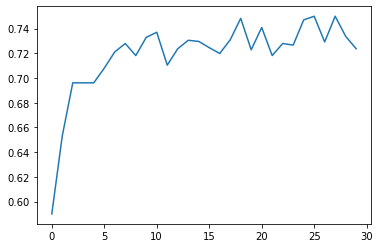

In [16]:
plt.plot(results.history['accuracy'])

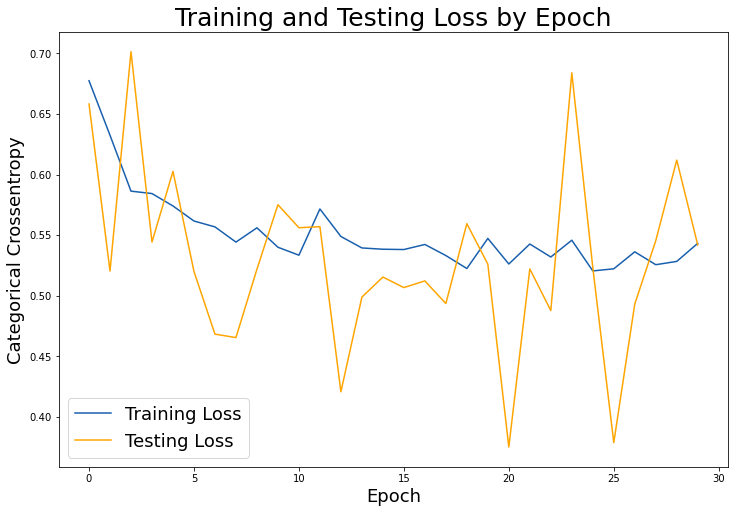

In [17]:
# Check out our train loss and test loss over epochs.
train_loss = results.history['loss']
test_loss = results.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

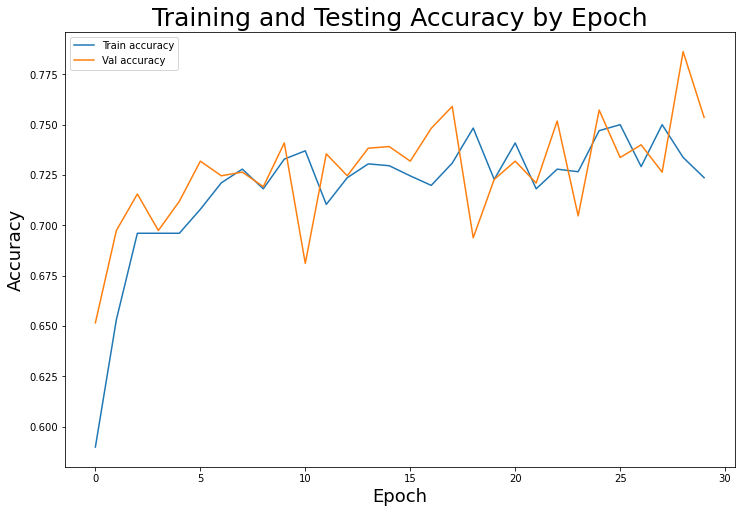

In [22]:
# Set figure size.
plt.figure(figsize=(12, 8))

plt.plot(results.history['accuracy'], label='Train accuracy')
plt.plot(results.history['val_accuracy'], label='Val accuracy')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.legend();

